# Data Mining

This NoteBook is dedicated to:

1. Data Cleaning and Preprocessing
2. Train and evaluating 4 different data mining models to understand complex patterns within collected data

the DM models as one of the critical components of a Decision support system will detect lying patterns and relations within data.

## Required Packages

In [1]:
import sys

sys.path.append(r"h:\Resume\Projects\DataScience\Banking Telemarketing Decision Support System\Project")

import pandas as pd
import numpy as np

import importlib

from src.data_preprocessing import process_dataset as prep

import src.data_ingestion as load
from src.models.model_selection import train_compare_models
from configs.config_repository import ConfigRepository

## Data Prepration

### Loading the data

In [2]:
df_train = load.load_csv_to_dataframe(file_path = '../data//raw/bank-full.csv')
df_test = load.load_csv_to_dataframe(file_path = '../data/raw/bank.csv' )

Dataset loaded successfully with 45211 rows and 17 columns.
Dataset loaded successfully with 4521 rows and 17 columns.


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Looking at the data composition 

searching for any harsh anomalies within the data


From Exploratory data analysis we know that the collected data doesn't show any abnormality .

### Data Cleaning
* Remove duplicate rows.
* Handle missing values.
* Correct textual inconsistencies
* removing outliers

### Data Transformation

* convert categorical variable into one_hot vector
* data normalization

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Loading configuration for preprocessing

In [5]:
cr = ConfigRepository(config_path="../configs/models_config.json")
fe_config = cr.get_config("fe_config")

In [6]:
# Preprocessing the data
data_train_prep = prep(
    df_=df_train,
    target_column='y',
    missing_method='drop',  # or 'fill'
    fill_value=None,
    fill_method=None,
    missing_threshold=0.5,
    outlier_removal=False,
    add_new_features=True,
    fe_config=fe_config,
    return_dataframe=True,
)
df_test
data_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44709 entries, 0 to 44708
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num__balance                   44709 non-null  float64
 1   num__day                       44709 non-null  float64
 2   num__duration                  44709 non-null  float64
 3   num__campaign                  44709 non-null  float64
 4   cat__job_admin.                44709 non-null  float64
 5   cat__job_blue-collar           44709 non-null  float64
 6   cat__job_entrepreneur          44709 non-null  float64
 7   cat__job_housemaid             44709 non-null  float64
 8   cat__job_management            44709 non-null  float64
 9   cat__job_retired               44709 non-null  float64
 10  cat__job_self-employed         44709 non-null  float64
 11  cat__job_services              44709 non-null  float64
 12  cat__job_student               44709 non-null 

In [7]:
data_test_prep = prep(
    df_=df_test,
    target_column='y',
    missing_method='drop',  # or 'fill'
    fill_value=None,
    fill_method=None,
    missing_threshold=0.5,
    outlier_removal=False,
    add_new_features=True,
    fe_config=fe_config,
    return_dataframe=True,
)

data_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4461 entries, 0 to 4460
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num__balance                   4461 non-null   float64
 1   num__day                       4461 non-null   float64
 2   num__duration                  4461 non-null   float64
 3   num__campaign                  4461 non-null   float64
 4   cat__job_admin.                4461 non-null   float64
 5   cat__job_blue-collar           4461 non-null   float64
 6   cat__job_entrepreneur          4461 non-null   float64
 7   cat__job_housemaid             4461 non-null   float64
 8   cat__job_management            4461 non-null   float64
 9   cat__job_retired               4461 non-null   float64
 10  cat__job_self-employed         4461 non-null   float64
 11  cat__job_services              4461 non-null   float64
 12  cat__job_student               4461 non-null   f

In [8]:
y_train = data_train_prep['y']
X_train = data_train_prep.drop(columns = ['y'])

In [9]:
X_test = data_test_prep.drop(columns = ['y'])

y_test = data_test_prep['y']

Trial 26 Complete [00h 00m 11s]
val_auc: 0.9317366480827332

Best val_auc So Far: 0.9317366480827332
Total elapsed time: 00h 05m 56s
 90/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Best Candidate's AUC: 0.9317
Epoch 1/50


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1398/1398 - 4s - 3ms/step - auc: 0.9028 - loss: 0.2182
Epoch 2/50
1398/1398 - 3s - 2ms/step - auc: 0.9235 - loss: 0.1978
Epoch 3/50
1398/1398 - 3s - 2ms/step - auc: 0.9298 - loss: 0.1909
Epoch 4/50
1398/1398 - 3s - 2ms/step - auc: 0.9338 - loss: 0.1862
Epoch 5/50
1398/1398 - 3s - 2ms/step - auc: 0.9373 - loss: 0.1821
Epoch 6/50
1398/1398 - 3s - 2ms/step - auc: 0.9397 - loss: 0.1788
Epoch 7/50
1398/1398 - 3s - 2ms/step - auc: 0.9421 - loss: 0.1758
Epoch 8/50
1398/1398 - 3s - 2ms/step - auc: 0.9437 - loss: 0.1734
Epoch 9/50
1398/1398 - 3s - 2ms/step - auc: 0.9458 - loss: 0.1706
Epoch 10/50
1398/1398 - 3s - 2ms/step - auc: 0.9475 - loss: 0.1683
Epoch 11/50
1398/1398 - 3s - 2ms/step - auc: 0.9491 - loss: 0.1660
Epoch 12/50
1398/1398 - 3s - 2ms/step - auc: 0.9503 - loss: 0.1639
Epoch 13/50
1398/1398 - 3s - 2ms/step - auc: 0.9520 - loss: 0.1614
Epoch 14/50
1398/1398 - 3s - 2ms/step - auc: 0.9529 - loss: 0.1593
Epoch 15/50
1398/1398 - 3s - 2ms/step - auc: 0.9539 - loss: 0.1579
Epoch 16/50
139

2025/04/30 03:31:05 INFO mlflow.tracking.fluent: Experiment with name 'MLP_Models' does not exist. Creating a new experiment.
2025/04/30 03:31:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'MLP'.
Created version '1' of model 'MLP'.
2025-04-30 03:31:30 — INFO — Evaluating NeuralNetwork on test set…


Model registered: MLP
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
y_test_proba: (4461,)


Models: 100%|██████████| 4/4 [4:42:31<00:00, 4237.97s/model]  


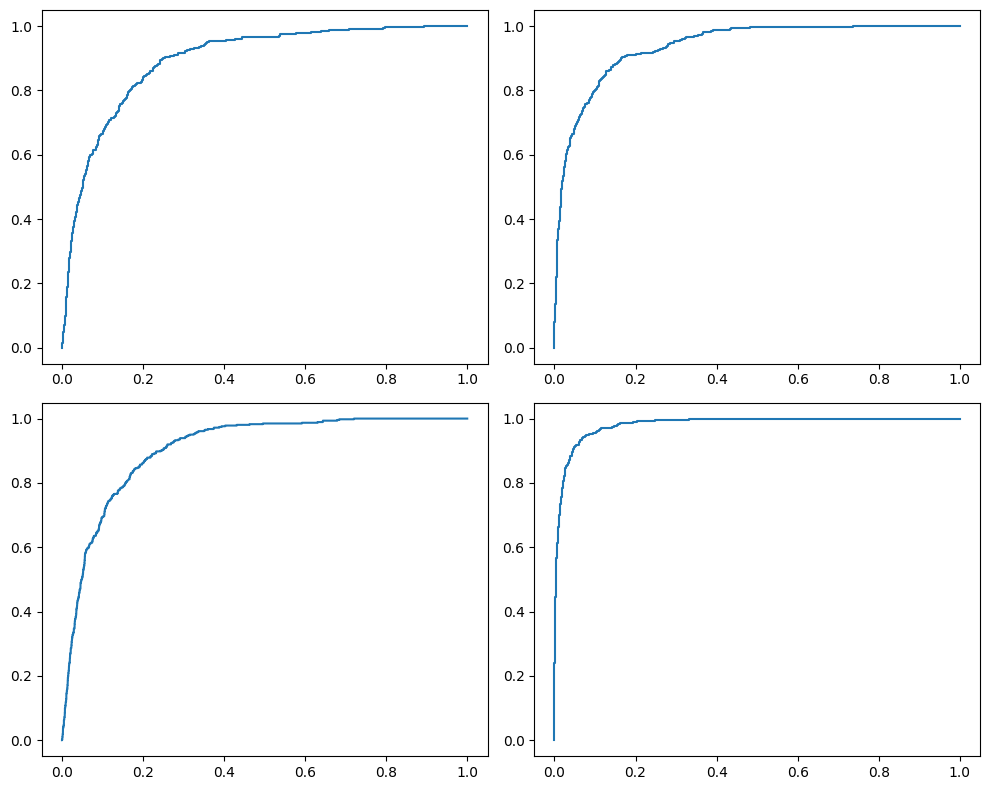

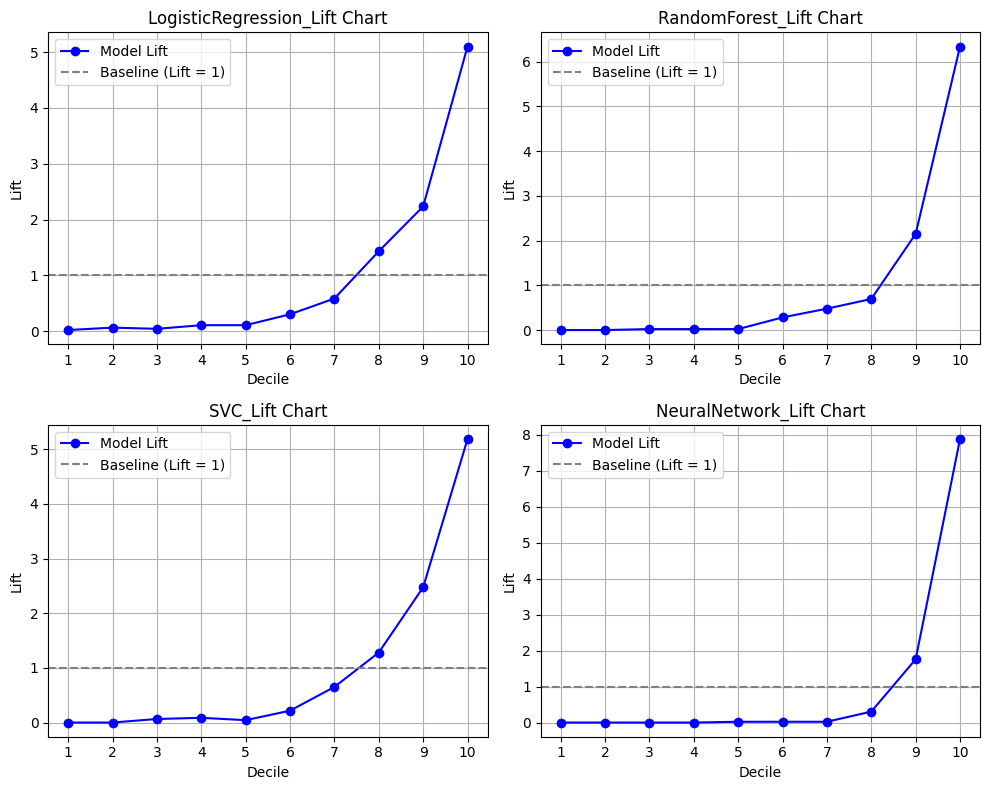

2025-04-30 03:31:32 — INFO — === Test set performance summary ===
2025-04-30 03:31:32 — INFO — LogisticRegression    AUC=0.895  ALIFT=1.000
2025-04-30 03:31:32 — INFO — RandomForest          AUC=0.938  ALIFT=1.000
2025-04-30 03:31:32 — INFO — SVC                   AUC=0.907  ALIFT=1.000
2025-04-30 03:31:32 — INFO — NeuralNetwork         AUC=0.982  ALIFT=1.000


In [10]:
results = train_compare_models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

the best performance on the test set is belong to Multilayer preceptron 

now we should prepare reference and training pipelines for it.